# Artificial Neural Network

### Importing the libraries

In [96]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [97]:
tf.__version__

'2.0.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [98]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [99]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [100]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [101]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [103]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [104]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [105]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Feature Scaling

In [106]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [107]:
print(X)

[[ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167  0.97024255
   0.02188649]
 [-1.00280393 -0.57873591  1.74273971 ... -1.54776799  0.97024255
   0.21653375]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.99720391 -0.57873591 -0.57380915 ... -1.54776799  0.97024255
  -1.00864308]
 [-1.00280393  1.72790383 -0.57380915 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
  -1.07636976]]


### Splitting the dataset into the Training set and Test set

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Part 2 - Building the ANN

### Initializing the ANN

In [164]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [176]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [177]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the third hidden layer

In [178]:
# ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [179]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

### Compiling the ANN

In [180]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

### Training the ANN on the Training set

In [181]:
history = ann.fit(X_train, y_train, batch_size =16, epochs = 100, validation_split=0.2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6400/6400 [==============================] - 2s 333us/sample - loss: 0.5970 - acc: 0.8384 - val_loss: 0.5156 - val_acc: 0.8419
Epoch 2/100
6400/6400 [==============================] - 1s 130us/sample - loss: 0.4473 - acc: 0.8559 - val_loss: 0.4161 - val_acc: 0.8413
Epoch 3/100
6400/6400 [==============================] - 1s 133us/sample - loss: 0.3839 - acc: 0.8586 - val_loss: 0.3843 - val_acc: 0.8462
Epoch 4/100
6400/6400 [==============================] - 1s 128us/sample - loss: 0.3632 - acc: 0.8537 - val_loss: 0.3763 - val_acc: 0.8444
Epoch 5/100
6400/6400 [==============================] - 1s 107us/sample - loss: 0.3544 - acc: 0.8577 - val_loss: 0.3755 - val_acc: 0.8438
Epoch 6/100
6400/6400 [==============================] - 1s 104us/sample - loss: 0.3515 - acc: 0.8577 - val_loss: 0.3695 - val_acc: 0.8450
Epoch 7/100
6400/6400 [==============================] - 1s 103us/sample - loss: 0.3486 - acc: 0.8578 - val_loss: 0.36

6400/6400 [==============================] - 1s 141us/sample - loss: 0.3338 - acc: 0.8609 - val_loss: 0.3559 - val_acc: 0.8537
Epoch 60/100
6400/6400 [==============================] - 1s 148us/sample - loss: 0.3356 - acc: 0.8594 - val_loss: 0.3592 - val_acc: 0.8562
Epoch 61/100
6400/6400 [==============================] - 1s 134us/sample - loss: 0.3339 - acc: 0.8619 - val_loss: 0.3589 - val_acc: 0.8487
Epoch 62/100
6400/6400 [==============================] - 1s 134us/sample - loss: 0.3357 - acc: 0.8605 - val_loss: 0.3552 - val_acc: 0.8494
Epoch 63/100
6400/6400 [==============================] - 1s 155us/sample - loss: 0.3339 - acc: 0.8605 - val_loss: 0.3656 - val_acc: 0.8481
Epoch 64/100
6400/6400 [==============================] - 1s 139us/sample - loss: 0.3339 - acc: 0.8609 - val_loss: 0.3569 - val_acc: 0.8550
Epoch 65/100
6400/6400 [==============================] - 1s 139us/sample - loss: 0.3352 - acc: 0.8612 - val_loss: 0.3597 - val_acc: 0.8512
Epoch 66/100
6400/6400 [=========

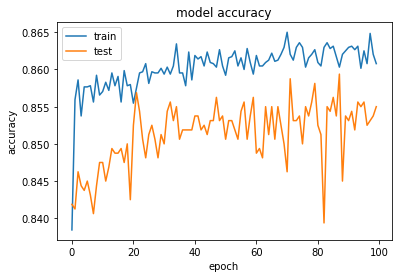

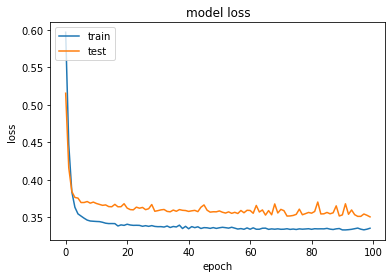

In [184]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [185]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [186]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1508   87]
 [ 179  226]]


Use our ANN model to predict if the customer with the following informations will leave the bank

Geography:France

Credit Score : 600

Gender:Male

Age:40 years old

Tenure:3years

Balance:$60000

Number of Products:2

Does this customer haveacredit card? Yes

Is this customer an Active Member : Yes

Estimated Salary:$50000

So,should we say goodbye to that customer?

In [187]:
print(ann.predict(sc.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]]))>0.5)

[[False]]


In [188]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy} or {accuracy * 100:.2f}%")

accuracy: 0.867 or 86.70%
